In [2]:
import pickle
import os,sys

In [3]:
file_path = "./12_02/noise.pickle"

In [4]:

# Check if the file exists
if os.path.exists(file_path):
  with open(file_path, 'rb') as file:
    try:
      loaded_data = pickle.load(file)
      print("Pickle file loaded successfully.")
      # print(loaded_data)  # Print or use the loaded data
    except EOFError:
      print("Error: The pickle file is empty.")
    except pickle.UnpicklingError:
      print("Error: Could not unpickle the file. It might be corrupted.")
    except Exception as e:
      print(f"An unexpected error occurred: {e}")
else:
  print(f"Error: The file '{file_path}' does not exist in Google Drive.")


Pickle file loaded successfully.


In [5]:
df=loaded_data[0]
# finding the sampling time and total time duration from the time_s series
sampling_time = df['time'][1] - df['time'][0]
total_time = df['time'][-1] - df['time'][0]
fs=1/sampling_time
print("Sampling time: ", sampling_time*1000000000, "ns")
print("Sampling frequency: ", fs/1000000, "MHz")
print("Total time duration: ", total_time*1000000, "micro s")
print("No. of samples: ", len(df["time"]))

Sampling time:  1.9687499999999998 ns
Sampling frequency:  507.936507936508 MHz
Total time duration:  2.01403125 micro s
No. of samples:  1024


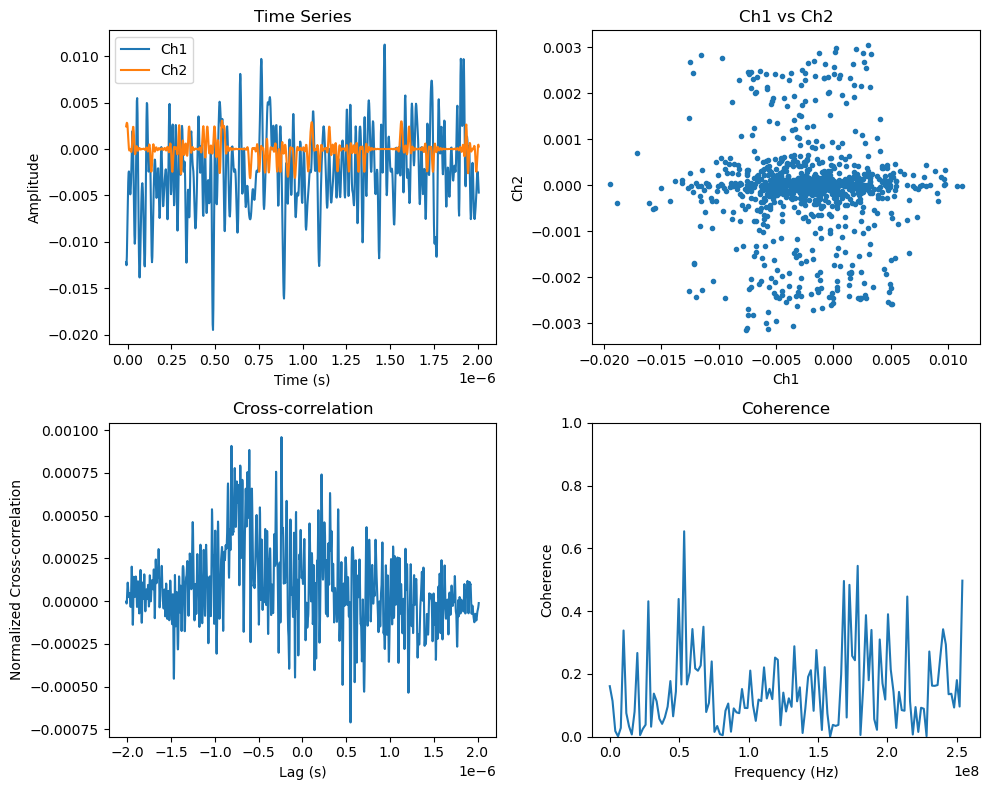

In [6]:
# prompt: plot as 2x2 gridplot: 1.plot ch1 ch2 timeseries,  2.ch1 vs ch2 plot , 3. normalised cross correlation between ch1 and ch2 with time axis and 4. the coherence of the ch1, ch2

import matplotlib.pyplot as plt
import numpy as np

# 1. Time series plot
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].plot(df['time'], df['ch1'], label='Ch1')
axs[0, 0].plot(df['time'], df['ch2'], label='Ch2')
axs[0, 0].set_xlabel('Time (s)')
axs[0, 0].set_ylabel('Amplitude')
axs[0, 0].legend()
axs[0, 0].set_title('Time Series')

# 2. Ch1 vs Ch2 plot
axs[0, 1].plot(df['ch1'], df['ch2'],".")
axs[0, 1].set_xlabel('Ch1')
axs[0, 1].set_ylabel('Ch2')
axs[0, 1].set_title('Ch1 vs Ch2')

# 3. Normalized cross-correlation
from scipy import signal

corr = signal.correlate(df['ch1'], df['ch2'], mode='full')
lags = signal.correlation_lags(len(df['ch1']), len(df['ch2']), mode="full")
axs[1, 0].plot(lags * sampling_time, corr)
axs[1, 0].set_xlabel('Lag (s)')
axs[1, 0].set_ylabel('Normalized Cross-correlation')
axs[1, 0].set_title('Cross-correlation')

# 4. Coherence
f, Cxy = signal.coherence(df['ch1'], df['ch2'], fs=fs)
axs[1, 1].plot(f, Cxy)
axs[1, 1].set_xlabel('Frequency (Hz)')
axs[1, 1].set_ylabel('Coherence')
axs[1, 1].set_title('Coherence')
axs[1, 1].set_ylim([0,1])

plt.tight_layout()
plt.show()


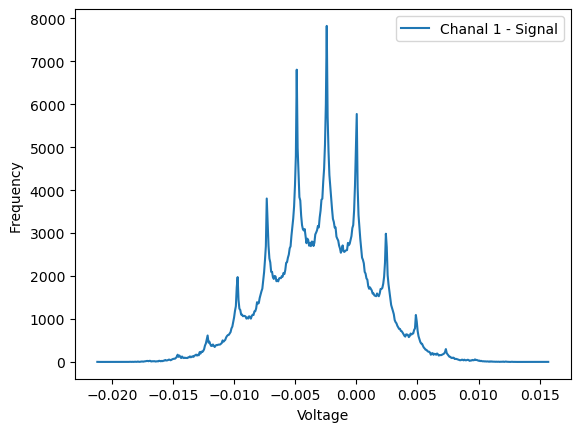

In [7]:
signal = []
for df in loaded_data:
    signal.append(df['ch1'])

signal = np.array(signal)
plt.figure()
hist, bins = np.histogram(signal.flatten(), bins=int(len(signal.flatten())*0.001)) 
bin_centers = (bins[:-1] + bins[1:]) / 2  # Compute bin centers for plotting
plt.plot(bin_centers, hist,label = "Chanal 1 - Signal")  # Line plot instead of bar histogram
#plt.yscale('log')
plt.xlabel('Voltage')
plt.ylabel('Frequency ')
plt.legend()
plt.show()

In [8]:
# plot Histogram and overlap with gaussian
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

Mean:  -0.0030112899919352357
Standard deviation:  0.004095643294580118


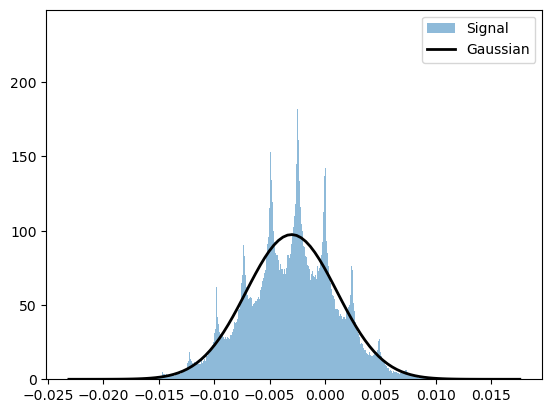

In [9]:
mean = np.mean(signal)
std = np.std(signal)
print("Mean: ", mean)
print("Standard deviation: ", std)


# Create a figure and axis
fig, ax = plt.subplots()

# Plot a histogram
ax.hist(signal.flatten(), bins=1000, alpha=0.5, label='Signal',density=True)

# Plot a gaussian
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
ax.plot(x, p, 'k', linewidth=2, label='Gaussian')
# Add a legend
ax.legend()
plt.show()

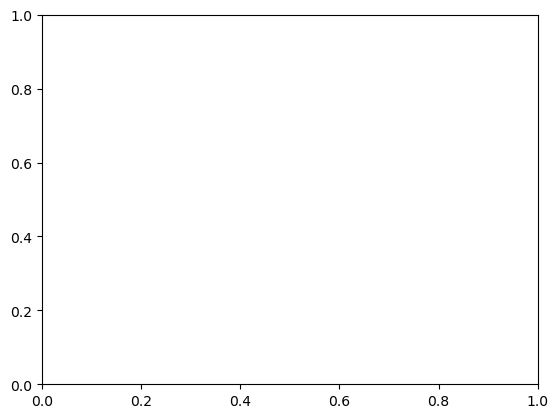

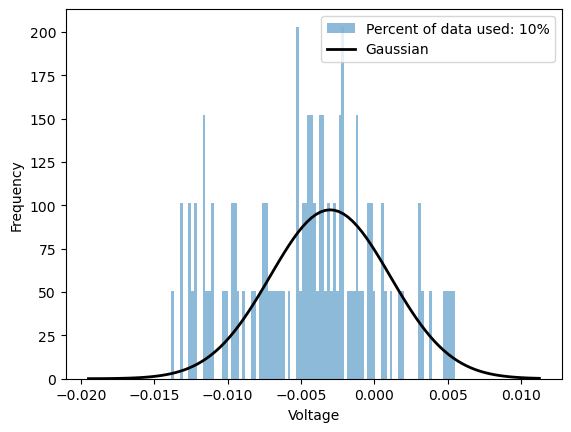

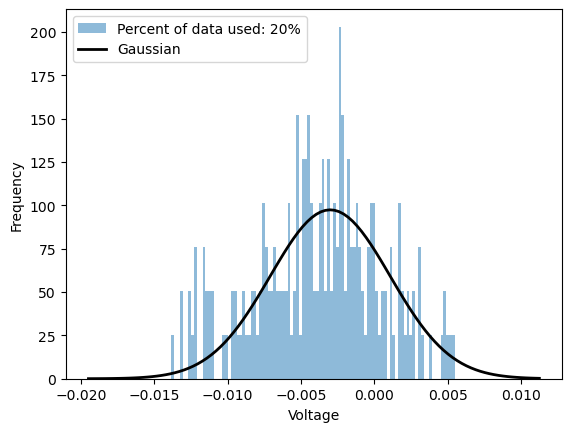

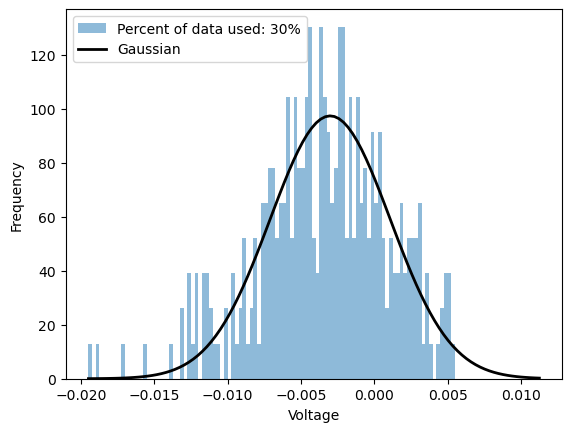

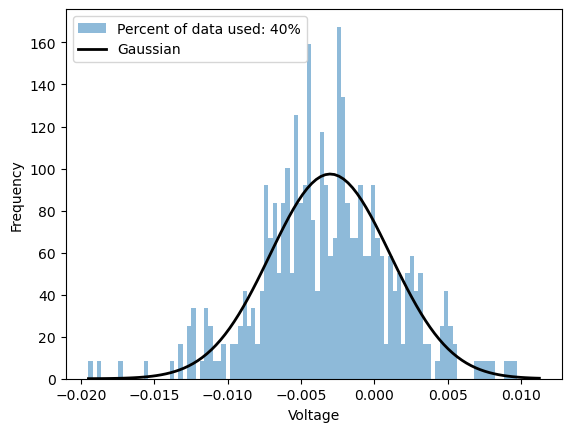

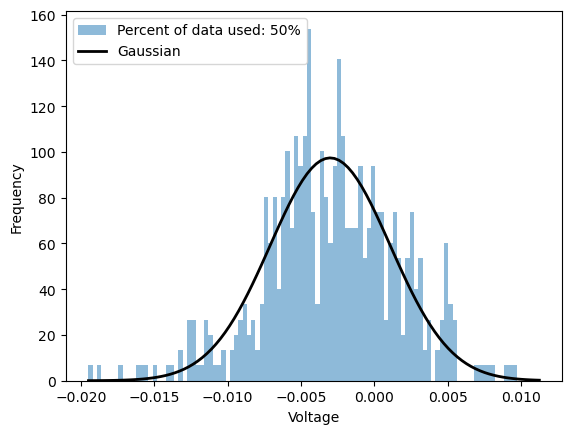

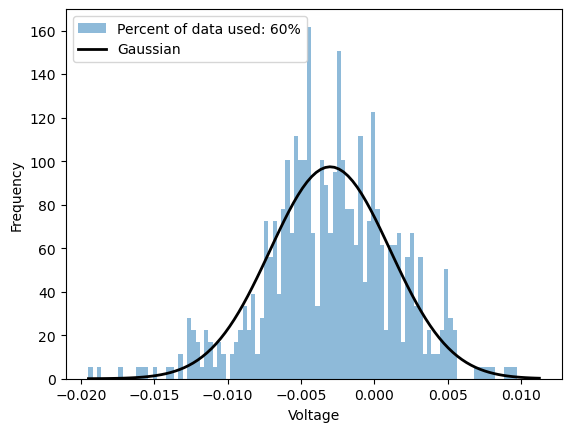

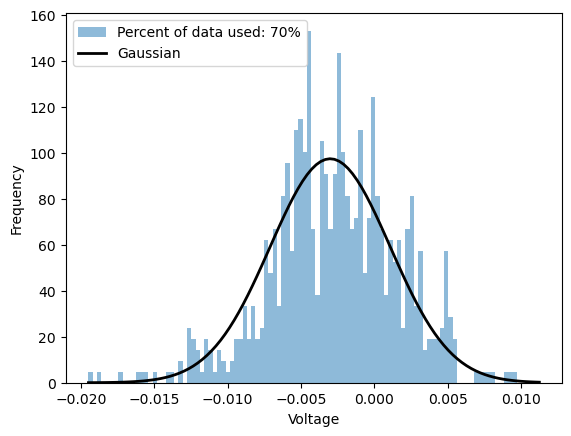

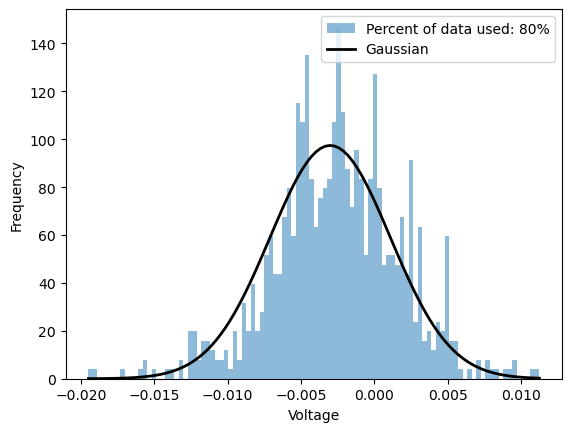

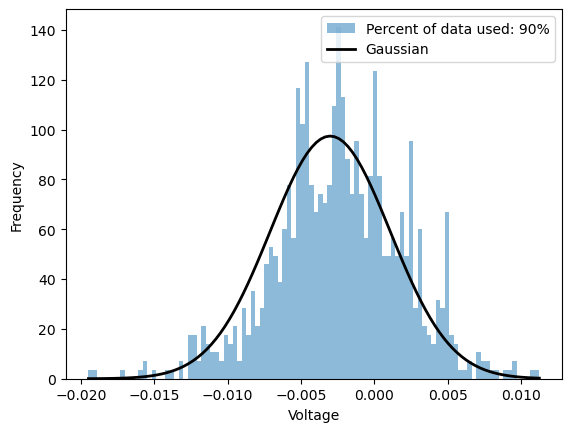

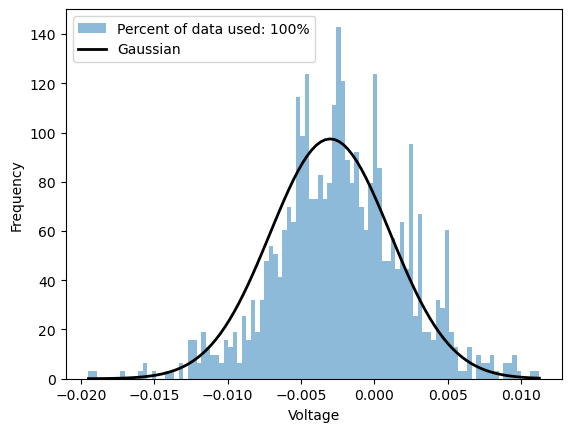

In [10]:
def plot_hist_percent(signal_part, bins=100,lable="signal"):
    fig, ax = plt.subplots()
    ax.hist(signal_part, bins=bins, alpha=0.5, label=lable,density=True)
    ax.set_xlabel('Voltage')
    ax.set_ylabel('Frequency')

signal=loaded_data[0]["ch1"]
# Plot a gaussian
xmin, xmax = plt.xlim()
x = np.linspace(min(signal), max(signal), 100)
p = norm.pdf(x, mean, std)


for i in range(1,11):
    signal_part = signal[0 : int((i/10)*len(signal))] 
    plot_hist_percent(signal_part, bins=100,lable = "Percent of data used: "+str(i*10)+"%")
    plt.plot(x, p, 'k', linewidth=2, label='Gaussian')
    # Add a legend
    plt.legend()
    plt.show()

In [11]:
allsignal = []
for df in loaded_data:
    allsignal.append(df['ch1'])


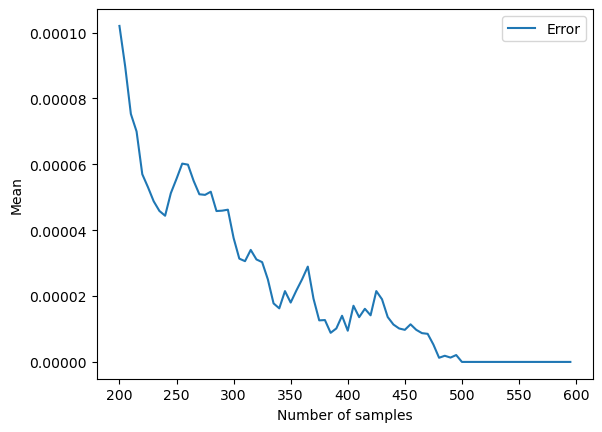

In [12]:
n_start = 200
n_end = 600
n_step = 5


true_mean = np.mean(allsignal)
true_std = np.std(allsignal)

mean_list = []

for n in range(n_start, n_end, n_step):
    mean = np.mean(allsignal[:n])
    mean_list.append(mean)

plt.plot(range(n_start, n_end, n_step), abs(mean_list-true_mean), label='Error')
plt.xlabel('Number of samples')
plt.ylabel('Mean')
plt.legend()
plt.show()

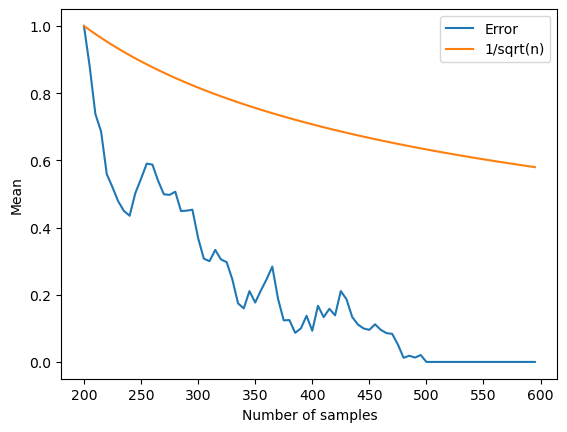

In [17]:
# normalised plot to compare the error and the 1/sqrt(n)
error = abs(mean_list-true_mean) / max(abs(mean_list-true_mean))
one_sqrt = 1/np.sqrt(range(n_start, n_end, n_step)) /(max(1/np.sqrt(range(n_start, n_end, n_step))))
#one_sqrt = 1/np.array(range(n_start, n_end, n_step)) /(max(1/range(n_start, n_end, n_step)))

plt.plot(range(n_start, n_end, n_step),error , label='Error')
plt.xlabel('Number of samples')
plt.ylabel('Mean')
plt.plot(range(n_start, n_end, n_step), one_sqrt , label='1/sqrt(n)')

plt.legend()
plt.show()
